<a href="https://colab.research.google.com/github/jimmy93029/Intro2AI-Final/blob/main/AI_Final_BASALT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center">
  <img src="https://github.com/KarolisRam/MineRL2021-Intro-baselines/blob/main/img/colab_banner.png?raw=true">
</div>

# Introduction
This notebook is the installation part for the [MineRL 2022](https://minerl.io/) competition, building on the original introductory notebooks created for the MineRL 2021 competition.

## Note: About this file

This file is updated by NYCU 2024 Spring Intro2AI Team 11: まふまふ.
The original file is come from [here](https://colab.research.google.com/drive/1rJ3lGy-bG7kJRe_wYBWg7fjSaD9oOMDw?usp=sharing)

## There's a video to explain...
Please visit [this intro YouTube video](https://youtu.be/8yIrWcyWGek) to see some background information.  Hopefully, this will lead to a number of additional videos that explore what can be done in this environment...

And if you see me=@mdda online, then please say "Hi!"

## Software 2.0
The approach we are going to use, where we took some human written code and replaced it with an AI component is quite similar to how Tesla approaches self driving cars. See this talk by Andrej Karpathy, Director of AI at Tesla:  
[Building the Software 2.0 Stack](https://databricks.com/session/keynote-from-tesla)


# Setup

In [1]:
%%capture
!sudo add-apt-repository -y ppa:openjdk-r/ppa
!sudo apt-get purge openjdk-*
!sudo apt-get install openjdk-8-jdk
!sudo apt-get install xvfb xserver-xephyr vnc4server python-opengl ffmpeg
# Takes ~1min to run this
# New Add
!sudo apt-get install -y xvfb  # Install Xvfb

In [2]:
# This takes ~22mins - which would hit us every time we start Colab
#   So we'll do it once, and store a '.tar.gz' of the installation into our
#   Google Drive, so that we can get it back much quicker the second time!

##%%capture
##!pip3 install --upgrade minerl # Default is 0.4.4, we want 1.0.0 for VPT
##!pip3 uninstall minerl
#!pip3 install git+https://github.com/minerllabs/minerl@v1.0.0
#
#!pip3 install pyvirtualdisplay
#!pip3 install -U colabgymrender

In [3]:
import os, sys, time

mine_env = 'mine_env'
mine_env_full = f'/content/{mine_env}'
mine_tar = f'{mine_env}.tar.gz'

if mine_env_full not in sys.path:
  sys.path.insert(0, mine_env_full)
  os.environ['PYTHONPATH'] += f':{mine_env_full}'

mine_env, mine_env_full, mine_tar

('mine_env', '/content/mine_env', 'mine_env.tar.gz')

In [4]:
# We'll connect to our Google Drive here, and see whether we've already saved off a copy
#   This will ask permission to 'connect to your drive' : The answer is 'Yes'!
MINE_ENV_IS_NEW = True

from google.colab import drive  # google.colab contains functions specifically for interacting with Google Colab's environment.
drive.mount('/content/drive')    # mounts your Google Drive as a local file system
if os.path.isfile(f'/content/drive/MyDrive/pythonLib/{mine_tar}'): # check if "mine_env.tar.gz" is in your Google Drive
  ! cp /content/drive/MyDrive/pythonLib/$mine_tar ./$mine_tar  # ! means the command is to be executed in the shell rather than as Python code.
                                              # This command copies the file from your Google Drive to the current working directory of the Colab notebook.

  ! ls -l ./$mine_tar                         # This lists the file details such as permissions, owner, size, and modification date for the copied file in the current directory.
                                              # It helps verify that the file has been copied correctly and shows its properties.
  # e.g.: -rw------- 1 root root 1510118446 Jun 26 08:48 ./mine_env.tar.gz

  # ! tar -tzf ./$mine_tar | grep minerl | head -5    # list some contents of the compressed tar file without extracting it
  ! tar -xzf ./$mine_tar    # This extracts the contents of the tar file into the current directory

  MINE_ENV_IS_NEW = False
  # Takes 1min too (huge saving!)

sys.path.append('/content/drive/MyDrive/pythonLib')
sys.path.append('/content/drive/MyDrive/pythonLib/VPT')

"DONE"

Mounted at /content/drive
-r-------- 1 root root 1504139165 May 30 14:57 ./mine_env.tar.gz


'DONE'

In [5]:
# Check default packages (execute if needed)
!pip3 list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
asttokens                        2.4.1
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [6]:
# Build the mine_env if necessary
try:
  from pyvirtualdisplay import Display
except :
  !pip3 install --target=$mine_env git+https://github.com/minerllabs/minerl@v1.0.2   # 21 mins
  # https://stackoverflow.com/questions/55833509/attributeerror-type-object-callable-has-no-attribute-abc-registry
  !mv $mine_env/typing.py $mine_env/MEH-typing.py  # Fix for Python3.7 ...

  !pip3 install --target=$mine_env pyvirtualdisplay  # 4 secs  #注 Display creates a virtual framebuffer that graphical applications can use to render output as if they were using a real monitor.
                                                              #注 This allows you to run applications that require a GUI without having an actual GUI environment installed on the system.
  !pip3 install --target=$mine_env --upgrade colabgymrender # 22 secs  #注 colabgymrender provides a workaround by capturing the graphical output of the environment and displaying it within the notebook.

  MINE_ENV_IS_NEW = True
  # NB: some restart notices in the output ... but there's no need to restart!
  #     In any case, please wait for the 'DONE' message to print out
f"DONE, with MINE_ENV_IS_NEW={MINE_ENV_IS_NEW}"

'DONE, with MINE_ENV_IS_NEW=False'

In [7]:
# check content of mine_env (execute if needed)
! du -b mine_env | tail -5  # mine_env = ~ 2,094,031,775 bytes overall (a little bit less)

23202	mine_env/minerl/MCP-Reborn/.gradle/buildOutputCleanup
6396898	mine_env/minerl/MCP-Reborn/.gradle
1528013442	mine_env/minerl/MCP-Reborn
1535278096	mine_env/minerl
2081310724	mine_env


In [8]:
# Build new env.tar.gz file in google drive (execute if needed)
if MINE_ENV_IS_NEW: #  or True
  # ! ls -l /gdrive/MyDrive/mine*
  ! rm -f ./$mine_tar   #注 removes the existing tar.gz archive of the environment, if any, from the current directory.
  ! tar -czf ./$mine_tar $mine_env  #注 This command creates a new compressed (gzipped) tar archive of the directory specified by the $mine_env variable (the environment directory).
  ! ls -l ./$mine_tar
  # Without running the env...
  # -rw-r--r-- 1 root root 1505020174 Jun 26 07:26 ./mine_env.tar.gz
  # Once the minerl env has been reset once (i.e. java has built...)
  # -rw------- 1 root root 1511976116 Jun 26 08:43 ./mine_env.tar.gz
  ! tar -tzf ./$mine_tar | head
  ! cp ./$mine_tar /content/drive/MyDrive/pythonLib/  #注 This copies the newly created archive to a Google Drive directory.
  ! ls -l /content/drive/MyDrive/pythonLib/$mine_tar
"DONE"

'DONE'

# Import Libraries

In [9]:
import os   # For interacting with the operating system.

import numpy as np  # For numerical operations.

import gym    # To create and manage environments based on the OpenAI Gym toolkit.
import minerl

from tqdm.notebook import tqdm  # For displaying progress bars in Jupyter notebooks.
from colabgymrender.recorder import Recorder # To facilitate rendering of Gym environments in Google Colab.
from pyvirtualdisplay import Display # To create a virtual display to render environments in a headless server or environment like Google Colab.

import logging
logging.disable(logging.ERROR) # reduce clutter, remove if something doesn't work to see the error logs.

np.__version__  # '1.21.6' => that this is reading from our ~/mine_env directory
# Numpy version may be different from the content above
# About warning: since warning is in a local package, so if error occurs, please comment the specific line

import cv2
#from google.colab.patches import cv2_imshow
#from PIL import Image
import matplotlib.pylab as plt

import glob
import json
import torch as th
import torchvision.transforms.functional as TF
from torch import nn
from torch.nn import functional as F
from torch import optim
from run_inverse_dynamics_model import json_action_to_env_action

  np.bool8: (False, True),



In [10]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")

# Download Dataset

In [29]:
from download_dataset import download_file
download_file(1500) # default is 400, about 40 GB?

total: 1500 | exist: 400 | downloading: 1100
[0%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-8da71e666c80-20220713-204425.mp4
[0%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-bd6b3a53d96d-20220712-000955.mp4
[0%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-c28f52cf718d-20220711-233634.mp4
[0%] Downloading /content/MineRLBasaltFindCave-v0/jumpy-denim-lion-3b2cd4ffb475-20220725-171016.mp4
[0%] Downloading /content/MineRLBasaltFindCave-v0/jumpy-denim-lion-8e5f2d3f02b2-20220725-155016.mp4
[0%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-cea2c630bb1d-20220713-200413.mp4
[1%] Downloading /content/MineRLBasaltFindCave-v0/lovely-persimmon-angora-10472c35fc9d-20220712-094632.mp4
[1%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-cac7bddaad83-20220711-233210.mp4
[1%] Downloading /content/MineRLBasaltFindCave-v0/gimpy-jade-panda-332534040046-20220715-161834.mp4
[1%] Downloading /content/MineRLBasaltFindCave-v

KeyboardInterrupt: 

# Construct Inverse Dynamic Model Agent

Optimal

In [ ]:
# from inverse_dynamics_model import load_IDM_agent
# IDMAgent = load_IDM_agent()

In [ ]:
# # Test for IDMAgent
# from agent import ENV_KWARGS # need to modify
# required_resolution = ENV_KWARGS["resolution"]
# files = glob.glob("/content/MineRLBasaltFindCave-v0/*.mp4")
# video_path = files[0]
# json_path = video_path.replace(".mp4", ".jsonl")

# cap = cv2.VideoCapture(video_path)
# frames = []

# json_index = 0
# with open(json_path) as json_file:
#   json_lines = json_file.readlines()
#   json_data = "[" + ",".join(json_lines) + "]"
#   json_data = json.loads(json_data)

# for _ in range(5000):
#   ret, frame = cap.read()
#   break
#   if not ret:
#     break
#   assert frame.shape[0] == required_resolution[1] and frame.shape[1] == required_resolution[0], "Video must be of resolution {}".format(required_resolution)
#   # BGR -> RGB
#   frames.append(frame[..., ::-1])
#   break
#   if len(frames) == 100 or len(frames) == 50:
#     l = len(frames)
#     fs = np.stack(frames)
#     predicted_actions = IDMAgent.predict_actions(fs)
#     for i in range(50):
#       env_action, _ = json_action_to_env_action(json_data[json_index])
#       json_index += 1
#       for y, (action_name, action_array) in enumerate(predicted_actions.items()):
#         print(f"{action_name}: {action_array[0, (l - 50 + i)]} ({env_action[action_name]}), ", end = "")
#       print("\n")
#     frames = frames[50:99]

# predicted_actions = IDMAgent.predict_actions(fs)
# l = len(frames)
# for i in range(50, l):
#   env_action, _ = json_action_to_env_action(json_data[json_index])
#   json_index += 1
#   for y, (action_name, action_array) in enumerate(predicted_actions.items()):
#     print(f"{action_name}: {action_array[0, (l - 50 + i)]} ({env_action[action_name]}), ", end = "")
#   print("\n")

# Neural Nwtwork for BC

In [12]:
# transform of env action and agent action
env = gym.make("MineRLBasaltFindCave-v0")

NOOP = env.action_space.no_op()

# binary encoding of env_action
# forward, back, left, right, sneak, sprint(run), jump, ESC = 2^7, ..., 2^0
ACTION_LIST = ["forward", "back", "left", "right", "sneak", "sprint", "jump", "ESC"]

def env_action_to_agent(env_action: dict):
  target_action_C = int(0)
  target_action_R = env_action["camera"]
  for act in ACTION_LIST:
    target_action_C *= 2
    target_action_C += 1 if env_action[act] == 1 else 0
  return [target_action_C, target_action_R]

def agent_action_to_env(agent_action_C, agent_action_R):
  target_action = NOOP
  ACTION_LIST_R = ACTION_LIST.copy().reverse()
  for act in ACTION_LIST_R:
    target_action[act] = 1 if agent_action % 2 == 1 else 0
    agent_action %= 2
  target_action["camera"] = agent_action_R
  return target_action

def img_to_tensor(frames):
  target_tensor = th.empty((0, 3, 227, 227), dtype = th.float32)
  for frame in frames:
    frame = frame[:, 140:500, :]
    frame = cv2.resize(frame, (227, 227))
    frame = TF.to_tensor(frame).unsqueeze(0)
    target_tensor = th.cat((target_tensor, frame), dim = 0)
  return target_tensor

In [13]:
# TODO: add parent class: AlexNet

class AlexNet(nn.Module):

  def __init__(self, output_size = 256):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, padding = 2)
    self.conv3 = nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, padding = 1)
    self.conv4 = nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, padding = 1)
    self.conv5 = nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, padding = 1)

    self.dropout = nn.Dropout(0.5)

    self.fc1 = nn.Linear(in_features = 256*6*6, out_features = 4096)
    self.fc2 = nn.Linear(in_features = 4096, out_features = 4096)
    self.fc3 = nn.Linear(in_features = 4096, out_features = output_size)

  def forward(self, input): # 227 * 227 * 3 RGB tensor
    x = F.relu(self.conv1(input))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = th.flatten(x, start_dim = 1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x # int between [0, 255]


# FindCave Agent

In [28]:
# TODO: train and test func

class FindCaveAgent():

  def __init__(self, learning_rate = 0.001):

    # For Classification (8 button)
    self.policyC = AlexNet(output_size = 256).to(device)
    self.optimizerC = optim.Adam(self.policyC.parameters(), lr = learning_rate)
    self.lossCFunc = nn.CrossEntropyLoss()

    # For regression (camera)
    self.policyR = AlexNet(output_size = 2).to(device)
    self.optimizerR = optim.Adam(self.policyR.parameters(), lr = learning_rate)
    self.lossRFunc = nn.MSELoss()

  def train(self, batch_size = 20):

    video_src = glob.glob("/content/MineRLBasaltFindCave-v0/*.mp4")
    vcaps = []
    vlength = []
    action_data = []
    action_index = 0
    counter = 0
    random_video = np.random.randint(len(video_src), size = batch_size)
    for x in random_video:
      vcaps.append(cv2.VideoCapture(video_src[x]))
      vlength.append(int(vcaps[-1].get(7)) - 1)
      with open(video_src[x].replace(".mp4", ".jsonl")) as json_file:
        json_lines = json_file.readlines()
        json_data = "[" + ",".join(json_lines) + "]"
        json_data = json.loads(json_data)
        action_data.append(json_data)
    while len(vcaps) != 0:
      counter += 1
      if counter % 20 == 0:
        print(counter)
      if action_index == 3000:
        break
      frames = np.array([vcap.read()[1] for vcap in vcaps])
      actionsC = np.empty(batch_size)
      actionsR = np.empty((batch_size, 2))
      pop_cap = []
      for i in range(batch_size):
        if action_index < vlength[i]:
          actions = env_action_to_agent(json_action_to_env_action(action_data[i][action_index])[0])
          actionsC[i] = actions[0]
          actionsR[i] = actions[1]
        else:
          actionsC[i] = 1
          actionsR[i] = [0, 0]
          pop_cap.append(i)
      if len(pop_cap) > 0:
        pop_cap.reverse()
        for i in pop_cap:
          vcaps.pop(i)
          vlength.pop(i)
          action_data.pop(i)
          batch_size -= 1
      frames_tensor = img_to_tensor(frames).to(device)
      actionC_tensor = th.LongTensor(actionsC).to(device)
      actionR_tensor = th.FloatTensor(actionsR).to(device)
      resultC = self.policyC(frames_tensor)
      resultR = self.policyR(frames_tensor)

      self.optimizerC.zero_grad()
      lossC = self.lossCFunc(resultC, actionC_tensor)
      lossC.backward()
      if counter % 20 == 0: print(lossC)
      self.optimizerC.step()

      self.optimizerR.zero_grad()
      lossR = self.lossRFunc(resultR, actionR_tensor)
      lossR.backward()
      if counter % 20 == 0: print(lossR)
      self.optimizerR.step()

      action_index += 1
    self.save_model_weights()

  def test(self):

    files = glob.glob("/content/MineRLBasaltFindCave-v0/*.mp4")
    video_path = files[0]
    json_path = video_path.replace(".mp4", ".jsonl")

    cap = cv2.VideoCapture(video_path)
    frames = []

    ret, frame = cap.read()
    frames.append(frame[::-1])
    ret, frame = cap.read()
    frames.append(frame[::-1])
    frames_tensor = img_to_tensor(frames)
    result = self.policyC.forward(frames_tensor).detach().cpu()
    print(result, type(result))

  def save_model_weights(self, path="model_weights.pth"):
    # Save the state dictionaries of models and optimizers
    th.save({
        'policyC_state_dict': self.policyC.state_dict(),
        'optimizerC_state_dict': self.optimizerC.state_dict(),
        'policyR_state_dict': self.policyR.state_dict(),
        'optimizerR_state_dict': self.optimizerR.state_dict(),
    }, path)

  def load_model_weights(self, path="model_weights.pth"):
    # Load the state dictionaries of models and optimizers
    checkpoint = th.load(path)
    self.policyC.load_state_dict(checkpoint['policyC_state_dict'])
    self.optimizerC.load_state_dict(checkpoint['optimizerC_state_dict'])
    self.policyR.load_state_dict(checkpoint['policyR_state_dict'])
    self.optimizerR.load_state_dict(checkpoint['optimizerR_state_dict'])

TA = FindCaveAgent()
TA.train()

20
tensor(2.2272, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8437, device='cuda:0', grad_fn=<MseLossBackward0>)
40
tensor(1.2368, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.5905, device='cuda:0', grad_fn=<MseLossBackward0>)
60
tensor(2.3649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.8480, device='cuda:0', grad_fn=<MseLossBackward0>)
80
tensor(2.2502, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5003, device='cuda:0', grad_fn=<MseLossBackward0>)
100
tensor(1.2093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2714, device='cuda:0', grad_fn=<MseLossBackward0>)
120
tensor(1.9503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9621, device='cuda:0', grad_fn=<MseLossBackward0>)
140
tensor(1.5767, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(11.0977, device='cuda:0', grad_fn=<MseLossBackward0>)
160
tensor(2.0522, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9110, device='cuda:0', grad_fn=<MseLossBackward0>)
180
tensor(

In [15]:
disp = Display(visible=0, backend="xvfb")
disp.start();

In [16]:
env.action_space.sample().keys()

odict_keys(['ESC', 'attack', 'back', 'camera', 'drop', 'forward', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'inventory', 'jump', 'left', 'pickItem', 'right', 'sneak', 'sprint', 'swapHands', 'use'])

In [17]:
# Have a look at a few actions we might do:
for _ in range(10):
  print( env.action_space.sample() )

OrderedDict([('ESC', array(1)), ('attack', array(1)), ('back', array(1)), ('camera', array([-174.53845 ,   21.478674], dtype=float32)), ('drop', array(0)), ('forward', array(0)), ('hotbar.1', array(0)), ('hotbar.2', array(1)), ('hotbar.3', array(0)), ('hotbar.4', array(1)), ('hotbar.5', array(1)), ('hotbar.6', array(0)), ('hotbar.7', array(0)), ('hotbar.8', array(0)), ('hotbar.9', array(0)), ('inventory', array(1)), ('jump', array(1)), ('left', array(0)), ('pickItem', array(0)), ('right', array(1)), ('sneak', array(0)), ('sprint', array(1)), ('swapHands', array(1)), ('use', array(1))])
OrderedDict([('ESC', array(0)), ('attack', array(0)), ('back', array(1)), ('camera', array([ -14.218526, -127.54496 ], dtype=float32)), ('drop', array(1)), ('forward', array(0)), ('hotbar.1', array(0)), ('hotbar.2', array(1)), ('hotbar.3', array(1)), ('hotbar.4', array(0)), ('hotbar.5', array(0)), ('hotbar.6', array(0)), ('hotbar.7', array(0)), ('hotbar.8', array(0)), ('hotbar.9', array(0)), ('inventory'

In [18]:
t0=time.time()
obs = env.reset()  # First obs is thrown away...
print(f"{(time.time()-t0):.2f}sec for env.reset")
# 275.65sec = 4mins for first time, 80.73sec second time (due to compilation of java files?)

123.17sec for env.reset


0.19sec for env.step


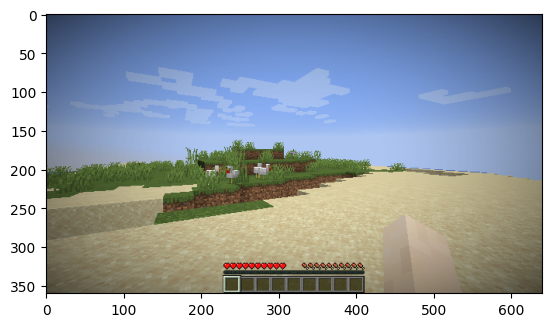

0.21sec for env.step


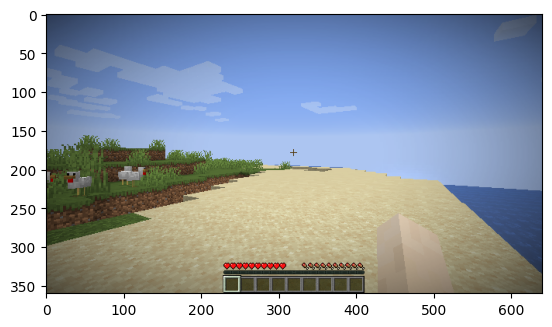

0.17sec for env.step


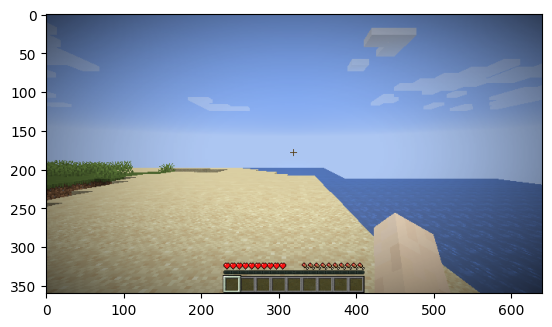

0.21sec for env.step


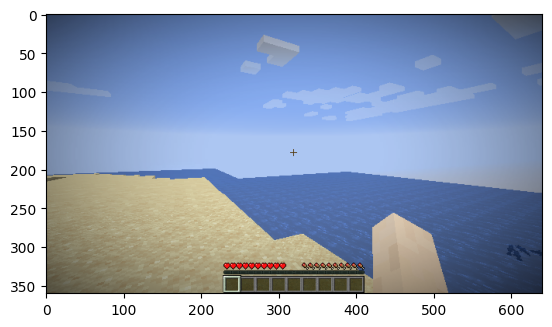

0.25sec for env.step


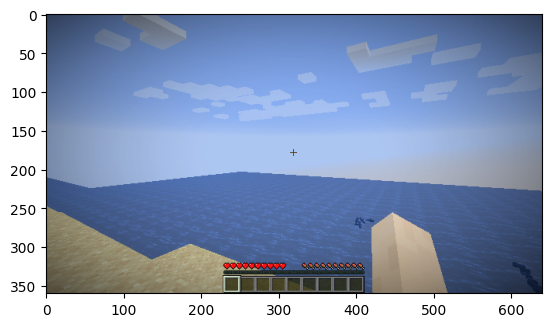

0.35sec for env.step


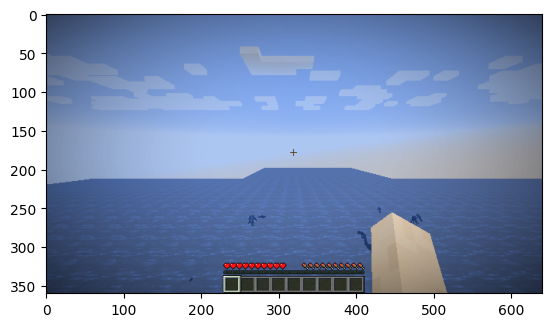

0.27sec for env.step


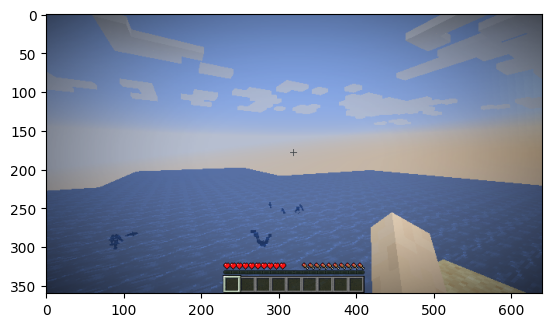

0.20sec for env.step


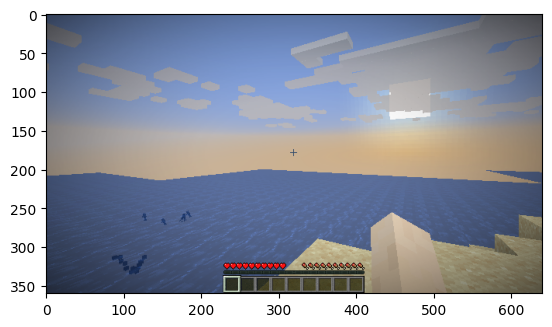

0.25sec for env.step


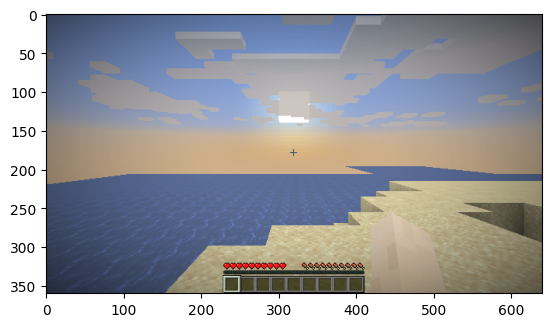

0.32sec for env.step


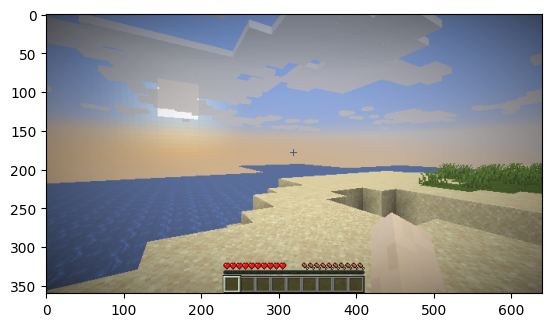

0.60sec for env.step


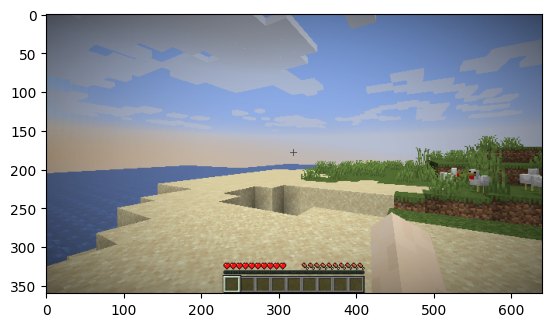

0.27sec for env.step


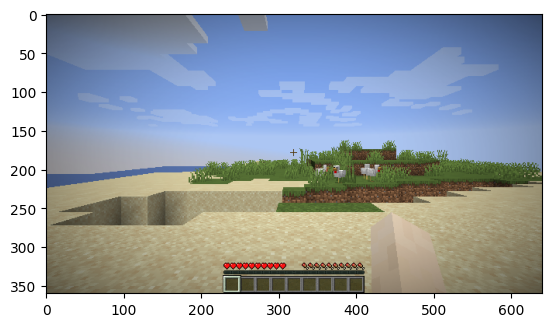

0.22sec for env.step


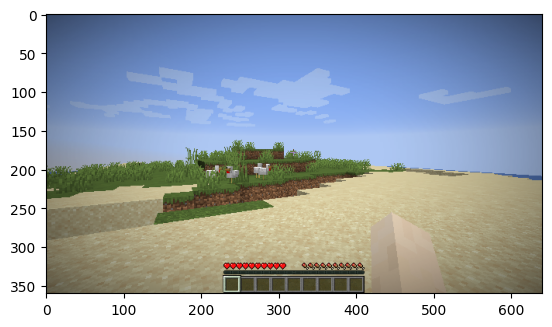

0.23sec for env.step


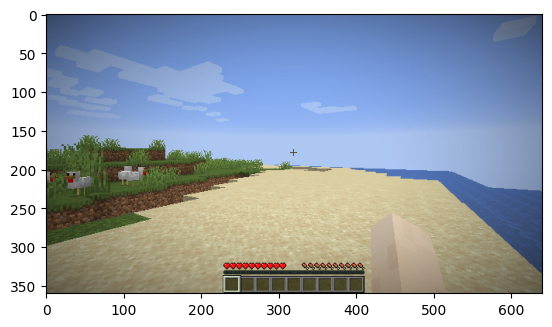

0.18sec for env.step


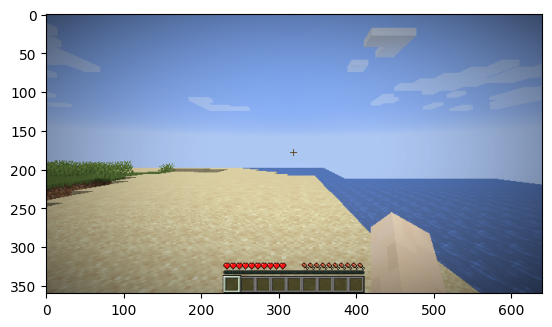

1.97sec for env.step


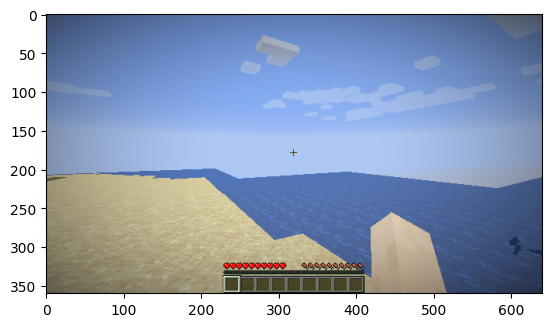

0.11sec for env.step


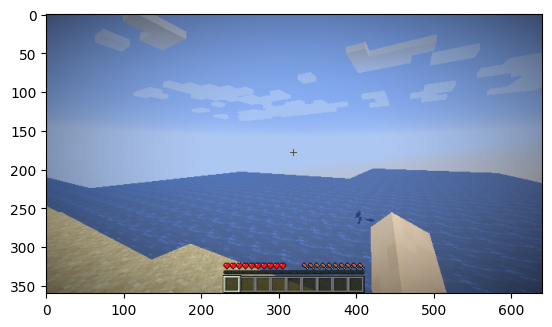

0.24sec for env.step


0.23sec for env.step


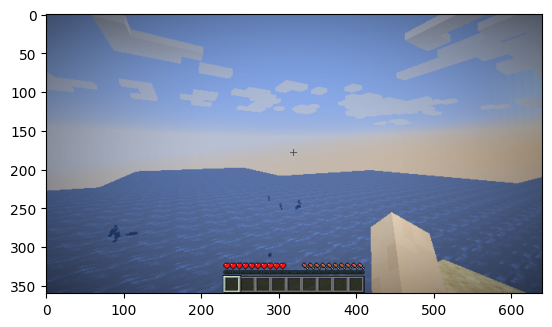

0.26sec for env.step


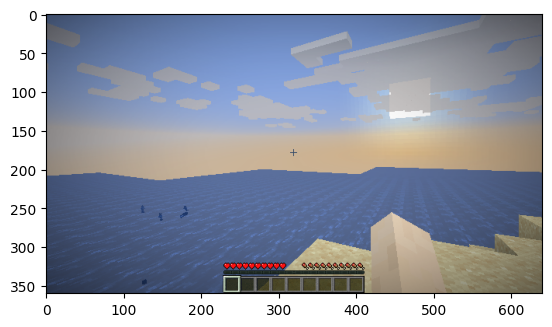

0.21sec for env.step


0.27sec for env.step


0.30sec for env.step


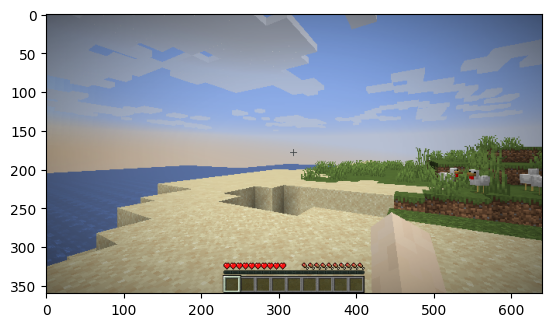

'21.05sec for whole spin'

In [19]:
# Now that Steve has been spawned, do some actions...
t0=time.time()

done, iter = False, 0
while not done:
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, +30]  # (pitch, yaw) deltas in degrees : +30 => turn to right

    t1=time.time()
    obs, reward, done, info = env.step(ac)
    #print(obs, reward, info)  # NB: Yikes : obs is only the image!
    #  obs = Dict(pov:Box(low=0, high=255, shape=(360, 640, 3)))
    #print(pov.shape) # (360, 640, 3)  Image spec agrees with docs!
    print(f"{(time.time()-t1):.2f}sec for env.step")  # Approx 0.25sec per step

    pov = obs["pov"]

    #env.render()  # This does an internal cv2.imshow that colab rejects
    #cv2_imshow(pov[:, :, ::-1])
    #cv2.waitKey(1)

    plt.imshow(pov)
    plt.show()
    iter +=1
    if iter>22: done=True

f"{(time.time()-t0):.2f}sec for whole spin"

In [20]:
# Set up a simple testing function
def action_step(action):
  ac = env.action_space.noop()
  ac.update(action)
  obs, reward, done, info = env.step(ac)
  plt.imshow(obs["pov"])
  plt.show()

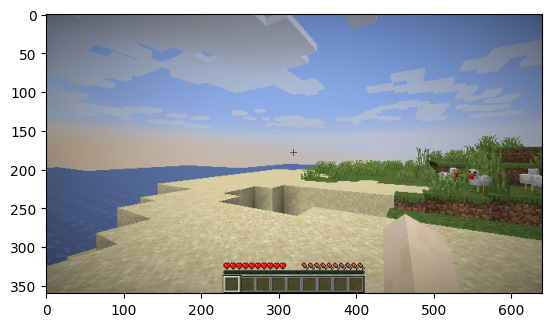

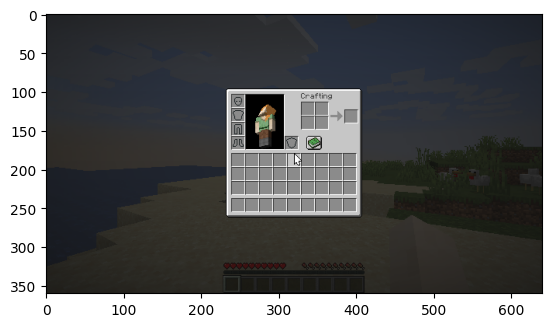

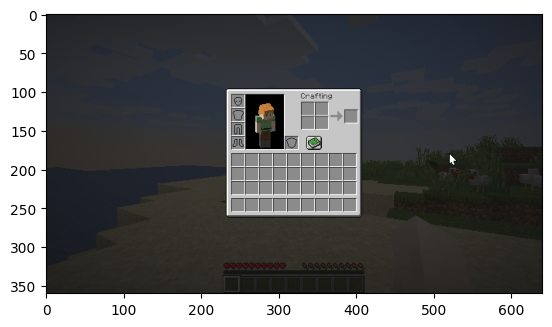

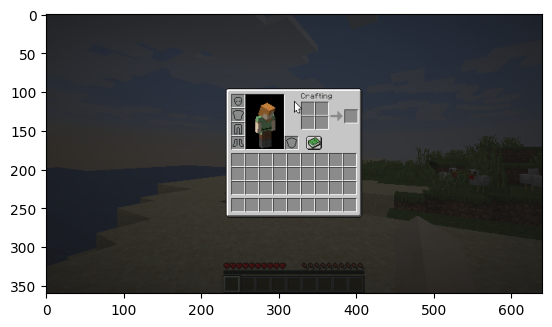

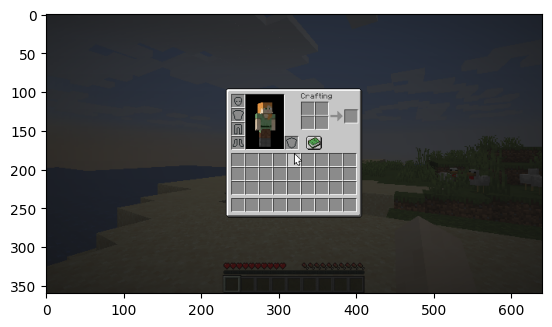

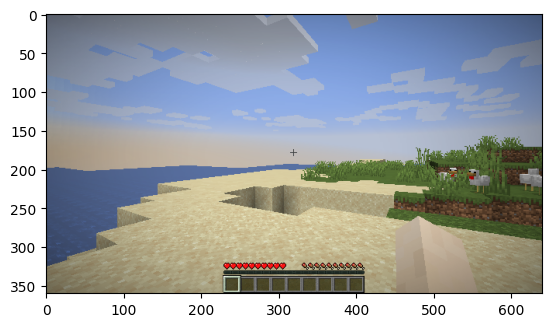

In [21]:
action_step({})
action_step(dict(inventory=[1]))
action_step(dict(camera=[0, +30]))
action_step(dict(camera=[-10, -30]))
action_step(dict(camera=[+10, 0]))
action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

In [22]:
#action_step({'inventory':[1]})  # Put inventory away? = NOT jump, sneak, use, hotbar.X, back
action_step({})  # NOOP

In [23]:
# Set up a simple calibration function
import cv2
from google.colab.patches import cv2_imshow

def action_step_calibrate(x_off,y_off):
  ac = env.action_space.noop()
  ac.update(dict(camera=[y_off, x_off]))
  obs, reward, done, info = env.step(ac)
  im = obs["pov"][100:250, 200:400,:]
  cv2_imshow(cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
  ac = env.action_space.noop()
  ac.update(dict(camera=[-y_off, -x_off]))  # Move back
  obs, reward, done, info = env.step(ac)

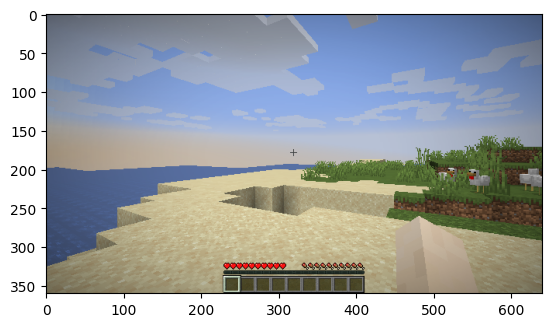

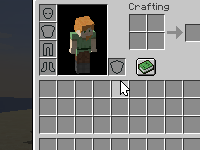

x_off=0.62


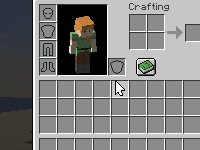

x_off=1.61


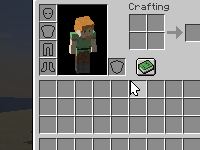

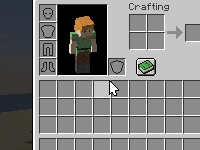

x_off=3.22


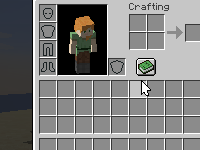

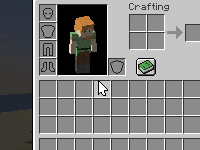

x_off=5.81


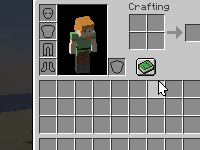

x_off=10.0


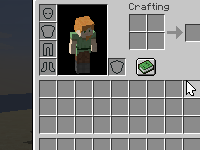

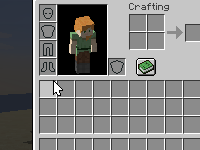

y_off=0.62


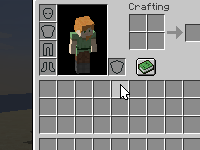

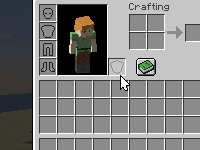

y_off=1.61


y_off=3.22


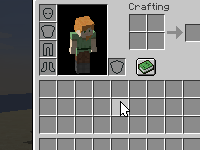

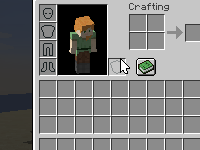

y_off=5.81


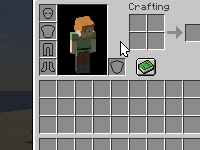

y_off=10.0


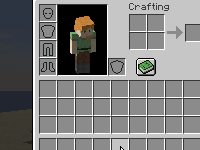

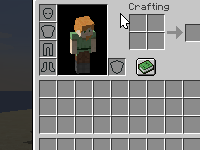

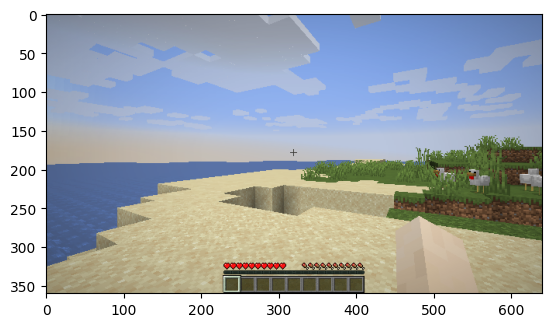

In [24]:
action_step({})
action_step(dict(inventory=[1]))

action_step_calibrate(0, 0)
for x_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"x_off={x_off}")
  action_step_calibrate(x_off,0)
  action_step_calibrate(-x_off,0)
for y_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"y_off={y_off}")
  action_step_calibrate(0, y_off)
  action_step_calibrate(0, -y_off)

action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

In [25]:
env.close()

In [26]:
disp.stop();

In [27]:
# THE END! - We'll be using this set-up in the future!